# Yearly Production of Vegetables and Animal Products per Country

In [1]:
# The usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
# Constants
DATA_PATH = '../data/'
GENERATED_DATA_PATH = '../generated/'

## Introduction
### Vegetables
To have an estimate of the total amount of vegetables produced by a country on a yearly basis, we will use the 'Production - Crops' data from the FAOSTAT dataset. The vegetable production is split in 10 categories, for which we only take into account the vegetables that are used for food (not *feed*).
These categories are:

1. Cereals: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef01e.htm
2. Roots and Tubers: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef02e.htm
3. Sugar Crops and Sweeteners: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef03e.htm
4. Pulses: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef04e.htm
5. Nuts: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef05e.htm
6. Oil Crops: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef06e.htm
7. Vegetables: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef07e.htm
8. Fruits: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef08e.htm
9. Spices: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef10e.htm
10. Stimulant Crops: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef12e.htm

For these categories, we closely looked at the available documentation to determine the relevant items. Derived products are thus not included.

### Animals
For the animals we consider three categories:

1. Meat: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef17e.htm
2. Fodder: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef11e.htm
3. Eggs: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef18e.htm#18.6
4. Milk: http://www.fao.org/waicent/faoinfo/economic/faodef/fdef18e.htm#18.1
    
For this the vegetable data is combined with the 'Production - Livestock Primary' dataset. Again, we avoid any overlaps, to get an estimate which is as closely as possible to the actual production within each category.

## Data Preperation

In [3]:
# Load the data
# Production - Crops dataset
production_crops = pd.read_csv(os.path.join(DATA_PATH, "Production_Crops_E_All_Data.csv"), encoding='latin-1')
production_livestock = pd.read_csv(os.path.join(DATA_PATH, "Production_LivestockPrimary_E_All_Data.csv"), encoding="latin-1")

# Load the items for each category
with open(os.path.join(DATA_PATH, "production_classifications.json"), "r") as f:
    classifications = json.load(f)
    
display(production_crops.head())
display(production_livestock.head())

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,14114.0,NaN,13703.0,NaN,14676.0,NaN,19481.0,NaN,19793.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,29910.0,Fc,19996.0,Fc,16521.0,Fc,16859.0,Fc,13788.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,42215.0,NaN,27400.0,NaN,24246.0,NaN,32843.0,NaN,27291.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,18500.0,F,30000.0,F,25000.0,F,26019.0,Im,28873.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,6757.0,Fc,7167.0,Fc,7200.0,Fc,6923.0,Fc,6830.0,Fc


,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1000 Head,4000.0,F,4400.0,...,9500.0,F,9500.0,F,9337.0,Im,9369.0,Im,10688.0,F
1,2,Afghanistan,1062,"Eggs, hen, in shell",5410,Yield,100mg/An,25000.0,Fc,25000.0,...,18947.0,Fc,19474.0,Fc,21253.0,Fc,21263.0,Fc,18713.0,Fc
2,2,Afghanistan,1062,"Eggs, hen, in shell",5510,Production,tonnes,10000.0,F,11000.0,...,18000.0,F,18500.0,F,19844.0,Im,19921.0,Im,20000.0,F
3,2,Afghanistan,1067,"Eggs, hen, in shell (number)",5513,Production,1000 No,200000.0,F,220000.0,...,360000.0,F,370000.0,F,396880.0,Im,398420.0,Im,400000.0,F
4,2,Afghanistan,919,"Hides, cattle, fresh",5320,Producing Animals/Slaughtered,Head,360000.0,F,384000.0,...,744500.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Combine both datasets
production = production_crops.append(production_livestock)

# Sudan is dived into two country Sudan (former) until 2011 and Sudan from 2012
# We will just merge both
production.loc[production[production['Area'] == 'Sudan (former)'].index,'Area'] = 'Sudan'

In [5]:
# Drop the flag columns for every year
production = production.drop([f"Y{i}F" for i in range(1961, 2018)], axis=1)

# Transform the dataset to contain seperate columns for the value and the year, instead of seperate columnts for 1961 - 2017
production = production.melt(id_vars=["Area Code", "Area", "Item", "Item Code", "Element Code", "Element", "Unit"],
                             value_name="Value",
                             var_name="Year")

# Clean the year column
production["Year"] = pd.to_numeric(production["Year"].str[1:])

# We are only interested in the Production in tonnes TODO: ARE WE? Area harvested/number of animals could be interesting?
production = production.query("`Element` == 'Production'")
# Drop the Element, Element Code, Unit and Area Code columns: aren't of interest anymore
production = production.drop(["Element Code", "Element", "Unit", "Area Code"], axis=1)

production.head()

,Area,Item,Item Code,Year,Value
2,Afghanistan,"Almonds, with shell",221,1961,NaN
5,Afghanistan,"Anise, badian, fennel, coriander",711,1961,NaN
8,Afghanistan,Apples,515,1961,15100.0
11,Afghanistan,Apricots,526,1961,32000.0
14,Afghanistan,Barley,44,1961,378000.0


In [6]:
# Get a seperate dataframe for each category

def items_to_dataset(items, name):
    """
    Transform the items list to a dataset that contains the sum of the items
    for every country per year, using the production_crops dataset
    """
    # transform the items to integers
    items = list(map(int, items))

    # select the data that contains the items we want to sum together
    selection = production[production["Item Code"].isin(items)]
    
    # drop the item and item code columns: will be summed away
    selection = selection.drop(["Item", "Item Code"], axis=1)
    
    # sum per area, per year
    selection = selection.groupby(["Area", "Year"], as_index=False).sum()
    
    # rename
    return selection.rename({"Value": name}, axis=1)
    
# create the dataset for the vegetable and meat categories
production_aggr = None
for key, val in list(classifications["Plants"].items()) + list(classifications["Animals"].items()):
    if production_aggr is None:
        production_aggr = items_to_dataset(val, key)
    else:
        production_aggr = production_aggr.merge(items_to_dataset(val, key), on=["Area", "Year"], how="outer")

In [7]:
production_aggr.query("`Area` == 'Belgium'").tail()

,Area,Year,Cereals,Roots,Sugar,Pulses,Nuts,Oilcrops,Vegetables,Fruit,Spices,Stimulants,Milk,Eggs,Meat
1078,Belgium,2013,3097497.0,3428000.0,4809300.0,4250.0,410.0,68300.0,2074064.0,582634.0,NaN,NaN,3483230.0,173530.0,1774712.0
1079,Belgium,2014,3162852.0,4380556.0,4790700.0,5888.0,405.0,65500.0,1892951.0,748224.0,NaN,NaN,3701535.0,151870.0,1814781.0
1080,Belgium,2015,3163733.0,3689994.0,4532561.0,7127.0,400.0,58744.0,1529210.0,723887.0,NaN,NaN,4006912.0,148025.0,1850880.0
1081,Belgium,2016,2287774.0,3402787.0,4021110.0,6583.0,395.0,48452.0,1752544.0,630677.0,NaN,NaN,3906695.0,154600.0,1805539.0
1082,Belgium,2017,2764392.0,4416665.0,5941783.0,6867.0,390.0,53812.0,1805035.0,450261.0,NaN,NaN,4058322.0,138320.0,1794958.0


## Preliminary Data Analysis

### Getting the PER CAPITA production of plant-based and animal-based food products

In [8]:
# Sum together production_aggr columns
production_aggr["PlantSum"] = production_aggr[classifications["Plants"].keys()].sum(axis=1)
production_aggr["AnimalSum"] = production_aggr[classifications["Animals"].keys()].sum(axis=1)
production_products = production_aggr[["Area", "Year", "PlantSum", "AnimalSum"]]

production_products.query("`Area` == 'Belgium'")

,Area,Year,PlantSum,AnimalSum
1026,Belgium,1961,0.0,0.0
1027,Belgium,1962,0.0,0.0
1028,Belgium,1963,0.0,0.0
1029,Belgium,1964,0.0,0.0
1030,Belgium,1965,0.0,0.0
1031,Belgium,1966,0.0,0.0
1032,Belgium,1967,0.0,0.0
1033,Belgium,1968,0.0,0.0
1034,Belgium,1969,0.0,0.0
1035,Belgium,1970,0.0,0.0


We have no data for Belgium from before 2000, so let's focus on 2000 - 2017 for our analysis

In [9]:
production_products = production_products.query("`Year` >= 2000")

Filter the data to only contain countries: aggregate data messes with the distribution

In [10]:
# Load countries
with open(os.path.join(GENERATED_DATA_PATH, "countries.json"), "r") as f:
    countries = json.load(f)

production_products = production_products[production_products["Area"].isin(countries)]

Load the population data, to get the per capita production

In [11]:
population = pd.read_csv(os.path.join(GENERATED_DATA_PATH, "population.csv"), encoding="latin-1")

In [12]:
population.query("`Country` == 'Belgium'").tail()

,Country,Year,Population
2839,Belgium,2096,12451318.0
2840,Belgium,2097,12461873.0
2841,Belgium,2098,12472363.0
2842,Belgium,2099,12482713.0
2843,Belgium,2100,12492833.0


In [13]:
# Devide the production by the population
production_per_cap = production_products.merge(population, how="inner", left_on=["Area", "Year"], right_on=["Country", "Year"])
production_per_cap["PlantSum"] = production_per_cap["PlantSum"] / production_per_cap["Population"]
production_per_cap["AnimalSum"] = production_per_cap["AnimalSum"] / production_per_cap["Population"]
production_per_cap = production_per_cap.drop(["Population", "Country"], axis=1)
production_per_cap.head()

,Area,Year,PlantSum,AnimalSum
0,Afghanistan,2000,0.211392,0.095623
1,Afghanistan,2001,0.212163,0.064699
2,Afghanistan,2002,0.275074,0.096627
3,Afghanistan,2003,0.295721,0.086547
4,Afghanistan,2004,0.241553,0.086253


We can now take a look at the data we gathered. By averaging the plant -and animal based production out over the period 2000 - 2017.

In [14]:
avg_production_per_cap = production_per_cap[["Area", "PlantSum", "AnimalSum"]].groupby("Area").mean()
avg_production_per_cap = production_per_cap[["Area", "PlantSum", "AnimalSum"]].groupby("Area").mean()

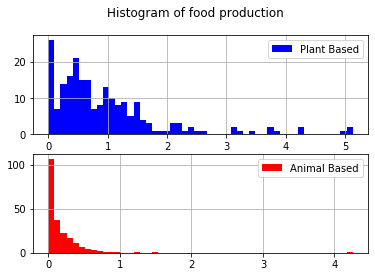

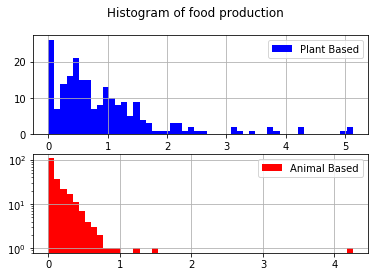

In [15]:
fig, ax = plt.subplots(2)
avg_production_per_cap["PlantSum"].hist(bins=50, ax=ax[0], color="Blue")
fig.suptitle("Histogram of food production")
ax[0].legend(["Plant Based"])
avg_production_per_cap["AnimalSum"].hist(bins=50, ax=ax[1], color="Red")
ax[1].legend(["Animal Based"])
plt.show()
fig, ax = plt.subplots(2)
avg_production_per_cap["PlantSum"].hist(bins=50, ax=ax[0], color="Blue")
fig.suptitle("Histogram of food production")
ax[0].legend(["Plant Based"])
ax[1].set_yscale("log")
avg_production_per_cap["AnimalSum"].hist(bins=50, ax=ax[1], color="Red")
ax[1].legend(["Animal Based"])
ax[1].set_yscale("log")
plt.show()

Based on the previous plots it appears to be that the per capita production of animal-based food products has an exponential distributions, however with one clear outlier. We can check which country this is.

In [16]:
outlier = avg_production_per_cap["AnimalSum"].idxmax()
outlier

'New Zealand'

This outlier actually makes sense, New Zealand is famous for its agriculture. New Zealands agriculture is still good for 2/3 of all exported goods. Taking a look at what this animal based production consists off, should give us a better idea of why we have this outlier:

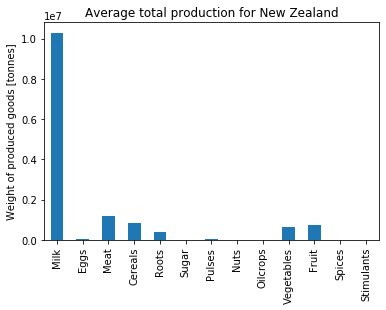

In [17]:
plt.figure()
production_aggr.query(f"`Area` == '{outlier}'").mean()[list(classifications["Animals"].keys()) + list(classifications["Plants"].keys())].plot.bar()
plt.title("Average total production for New Zealand")
plt.ylabel("Weight of produced goods [tonnes]")
plt.show()

The outlier can clearly be explained by the huge amount of milk that is produced in New Zealand.

If we go back to the previous histograms, and take a look at the distribution of the plant-based food products, this appears to have some multimodal distribution, with two major modes at ~0.5 tonnes/cap and 1 tonnes/cap.

Something that also jumps into the eye when looking at both distributions, is that there are a lot of very small values for both the animal -and plant based distributions. This, at least visually, seems off. This was however kind of expected because of the way we collect the aggregates. Not every good is produced by every country, so most of the time a missing value indicates that the good is not produced in that country. However this also means the 'real' missing values, the ones that don't fit the actual distribution, are also set to zero. This is for example the case for ALL goods for Belgium until 2000, that was why we took the average from 2000 - 2017

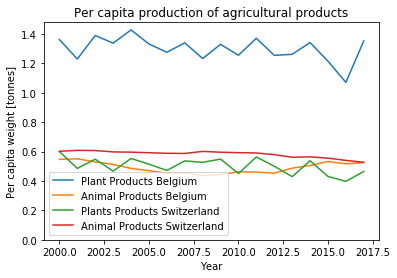

In [18]:
b = production_per_cap.query("`Area` == 'Belgium'")
s = production_per_cap.query("`Area` == 'Switzerland'")
plt.figure()
plt.plot(b["Year"], b["PlantSum"], label="Plant Products Belgium")
plt.plot(b["Year"], b["AnimalSum"], label="Animal Products Belgium")
plt.plot(s["Year"], s["PlantSum"], label="Plants Products Switzerland")
plt.plot(s["Year"], s["AnimalSum"], label="Animal Products Switzerland")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Per capita weight [tonnes]")
plt.title("Per capita production of agricultural products")
plt.ylim(0, None)
plt.show()

From the plots above we can see that the per capita production stayed pretty much the same over the last couple of years. The think that does stand out is that the plant-based food production in Belgium is way higher than in Switzerland, and than the animal-based food production in both countries. This is actually not that strange if we recall the histograms plotted above. There we could see that the animal-based production values lie closer together, and closer to zero than the plant-based production values. Apperently Belgiums plant-based production is in the 'second mode' of the plant-based production distribution, while switzerland is in the 'first mode'.